In [36]:
import numpy as np
import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline 

In [20]:
iris_data = load_iris() # load the iris dataset
x = iris_data.data
y = iris_data.target.reshape(-1, 1) # Convert data to a single column

In [21]:
y = keras.utils.to_categorical(y , num_classes=3)

In [27]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)
train_x.shape

(120, 4)

In [28]:
model = Sequential()
model.add(Dense(10, activation='relu' , input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
for i in range(200):
    model.fit(train_x, train_y,
              epochs=1,
              batch_size=5, verbose=0)
    # Test on unseen data
    loss, acc = model.evaluate(test_x, test_y)
    test_loss += [loss]
    test_acc += [acc]
    loss, acc = model.evaluate(train_x, train_y , verbose=0)
    train_loss += [loss]
    train_acc += [acc]
    
print("Test Accuracy:",test_acc[-1],"\nMaximum Test Acuracy During Training: ", max(test_acc))    
print("Test Loss:",test_loss[-1],"\nMinimum Test Loss During Training: ", min(test_loss))

1/1 [==============================] - 0s 999us/step - loss: 0.0156 - accuracy: 1.0000
Test Accuracy: 1.0 
Maximum Test Acuracy During Training:  1.0
Test Loss: 0.015649378299713135 
Minimum Test Loss During Training:  0.009851085022091866


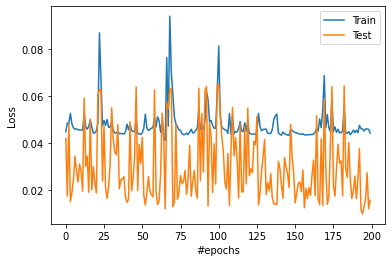

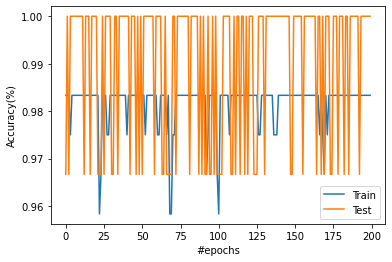

In [44]:
plt.figure(1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()